In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
# 한 셀에서 여려 결과 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
# 열이름 / 인덱스 설정
user_data = [
    ['홍길동', 20, 60.1, 170.5, '남', '1999-01-01', 1100],
    ['성춘향', 20, 51.3, 160.5, '여', '1989-03-11', 2200],
    ['이몽룡', 20, None, 175.5, '남', '1979-05-21', 3300],
    ['변학도', 30, 60.1, None, '여', '1995-07-22', 4400],
    ['강길동', 30, 60.1, 173.5, '남', '1929-09-15', 5500],
    ['이순신', 30, 60.1, 173.5, '여', '2009-09-01', None]  
]
columns = ['이름', '연령대', '몸무게', '키', '성별', '생일', '지역코드']
user = pd.DataFrame(user_data, columns=columns)

## groupby 구성 요소 및 절차
### 1. split : 데이터를 그룹으로 나눔
### 2. apply : 그룹별로 집계함수를 적용 => mean, sum, agg, ...
### 3. combine : 결과를 결합하는 과정 => 자동 수행

In [ ]:
user.groupby("성별")[["몸무게", "키"]].sum()
user.groupby("성별")[["몸무게", "키"]].mean()
user.groupby("성별")[["몸무게", "키"]].count()
user.groupby("성별")[["몸무게", "키"]].agg(["sum", "mean"])
t = user.groupby(["성별", "연령대"])[["몸무게", "키"]].agg(["sum", "mean"])
t.loc["남"]
t.loc[("남", 20)]

,몸무게,키
성별,,
남,120.2,519.5
여,171.5,334.0


,몸무게,키
성별,,
남,60.100000,173.166667
여,57.166667,167.000000


,몸무게,키
성별,,
남,2,3
여,3,2


몸무게                 키            
      sum       mean    sum        mean
성별                                     
남   120.2  60.100000  519.5  173.166667
여   171.5  57.166667  334.0  167.000000

몸무게            키       
      sum  mean    sum   mean
연령대                          
20   60.1  60.1  346.0  173.0
30   60.1  60.1  173.5  173.5

몸무게  sum      60.1
     mean     60.1
키    sum     346.0
     mean    173.0
Name: (남, 20), dtype: float64

## 과정을 쪼개서 보면 

In [ ]:
t = user.groupby(["성별", "연령대"])[["몸무게", "키"]] # 1번 split 까지만 진행된 상태인거임
t
t.get_group(("남", 20))
t.apply(lambda x :x.fillna(x.mean()).sum()) 

,몸무게,키
0,60.1,170.5
2,NaN,175.5


몸무게      키
성별 연령대              
남  20   120.2  346.0
   30    60.1  173.5
여  20    51.3  160.5
   30   120.2  347.0

In [15]:
emp = pd.read_csv("./data/emp.csv")
emp.head()
# 부서별 사원들의 평균 급여를 구하시오
pd.options.display.float_format = '{:.2f}'.format
emp.groupby("DEPT_CODE")[["SALARY"]].mean().astype(int)

# 연도별 입사자 수
emp.groupby(pd.to_datetime(emp["HIRE_DATE"]).dt.year)[["EMP_ID"]].count().T

,EMP_ID,EMP_NAME,EMP_NO,EMAIL,PHONE,DEPT_CODE,JOB_CODE,SAL_LEVEL,SALARY,BONUS,MANAGER_ID,HIRE_DATE,ENT_DATE,ENT_YN
0,200,선동일,621230-1985634,sun_di@or.kr,1099546325.00,D9,J1,S1,8000000.00,0.30,NaN,1990-02-06 00:00:00,NaN,N
1,201,송종기,631123-1548654,song_jk@or.kr,1045686656.00,D9,J2,S1,6000000.00,0.00,200.00,2001-09-01 00:00:00,NaN,N
2,202,노옹철,861015-1356452,no_hc@or.kr,1066656263.00,D9,J2,S4,3700000.00,0.00,201.00,2001-01-01 00:00:00,NaN,N
3,203,송은희,631010-2653546,song_eh@or.kr,1077607879.00,D6,J4,S5,2800000.00,0.00,204.00,1996-05-03 00:00:00,NaN,N
4,204,유재식,660508-1342154,yoo_js@or.kr,1099999129.00,D6,J3,S4,3400000.00,0.20,200.00,2000-12-29 00:00:00,NaN,N


,SALARY
DEPT_CODE,
D1,2606666
D2,2173333
D5,2626666
D6,3366666
D8,2328746
D9,5900000


HIRE_DATE,1990,1994,1996,1997,1999,2000,2001,2004,2007,2008,2010,2011,2012,2013,2014,2015,2016,2017
EMP_ID,1,2,1,1,3,1,3,1,1,1,1,1,1,1,1,1,1,1


- 사고년도,  acc_year
- 발생월일시, occrrnc_dt
- 낮밤, dght_cd
- 사망자수, dth_dnv_cnt
- 부상자수, injpsn_cnt
- 시도코드, occrrnc_lc_sido_cd,
- 시군구코드, occrrnc_lc_sgg_cd
- 경도, lo_crd
- 위도, la_crd

In [40]:
df = pd.read_json("./data/fakedata.json")
df
df = pd.json_normalize(df["items"].iat[0]) # = df["items"][0]
df
df = df[["occrrnc_dt", "dght_cd", "dth_dnv_cnt", "injpsn_cnt"]]
df

,resultCode,resultMsg,items,totalCount,numOfRows,pageNo
item,0,NORMAL_CODE,"[{'acc_year': '2023', 'occrrnc_dt': '202301010...",2468,2468,1


,acc_year,occrrnc_dt,dght_cd,occrrnc_day_cd,dth_dnv_cnt,injpsn_cnt,se_dnv_cnt,sl_dnv_cnt,wnd_dnv_cnt,occrrnc_lc_sido_cd,...,acc_ty_cd,aslt_vtr_cd,road_frm_lclas_cd,road_frm_cd,wrngdo_isrty_vhcty_lclas_cd,dmge_isrty_vhcty_lclas_cd,occrrnc_lc_x_crd,occrrnc_lc_y_crd,lo_crd,la_crd
0,2023,2023010107,1,1,1,1,0,0,0,2000,...,37,05,01,05,05,##,1089954,1651437,128.48401331,34.85362252
1,2023,2023010107,1,1,1,1,0,0,0,1500,...,05,05,01,05,10,12,1015896,1885475,127.67857890,36.96757277
2,2023,2023010110,1,1,1,1,0,0,0,1900,...,05,05,01,05,03,12,1181459,1784728,129.51430954,36.04253106
3,2023,2023010114,1,1,1,1,0,0,0,1300,...,32,05,01,05,05,##,943961,1915763,126.86819905,37.23904589
4,2023,2023010118,2,1,1,1,0,0,0,1300,...,37,05,01,05,05,##,974470,1970403,127.21026475,37.73288307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463,2023,2023123103,2,1,1,1,0,0,0,1300,...,32,05,01,05,01,##,931197,1967305,126.71948916,37.70273252
2464,2023,2023123108,1,1,1,1,0,0,0,1400,...,25,05,02,06,03,03,1095703,2021093,128.59278007,38.18502071
2465,2023,2023123111,1,1,1,1,0,0,0,1900,...,37,05,01,05,05,##,1061423,1768007,128.18070603,35.90677059
2466,2023,2023123121,2,1,1,1,0,0,0,1600,...,01,05,01,05,01,12,970432,1870067,127.16843029,36.82834804


,occrrnc_dt,dght_cd,dth_dnv_cnt,injpsn_cnt
0,2023010107,1,1,1
1,2023010107,1,1,1
2,2023010110,1,1,1
3,2023010114,1,1,1
4,2023010118,2,1,1
...,...,...,...,...
2463,2023123103,2,1,1
2464,2023123108,1,1,1
2465,2023123111,1,1,1
2466,2023123121,2,1,1


dth_dnv_cnt  injpsn_cnt
date dght_cd                         
0    1                218         337
     2                153         225
1    1                204         291
     2                148         265
2    1                219         307
     2                167         228
3    1                193         317
     2                198         279
4    1                232         404
     2                167         234
5    1                186         332
     2                152         204
6    1                150         237
     2                164         244

<Axes: ylabel='Frequency'>

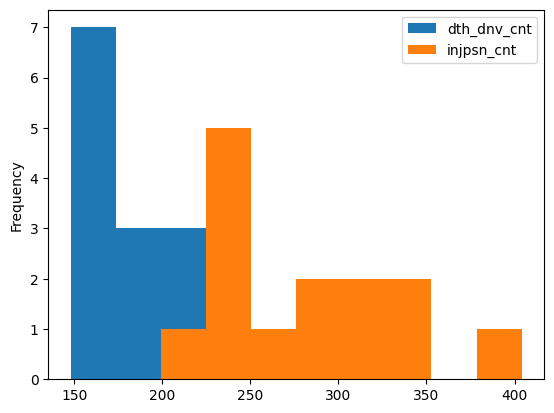

In [47]:
# 월별 사망자수와 부상자수 합계를 확인
df["date"] = pd.to_datetime(df["occrrnc_dt"].str[0:8])
df_1 = df.groupby(df["date"].dt.month)[["dth_dnv_cnt", "injpsn_cnt"]].sum()
# df_1.plot()

# 요일별 낮밤별 사망자 부상자 수 구하기
df_2 = df.groupby([df["date"].dt.dayofweek, "dght_cd"])[["dth_dnv_cnt", "injpsn_cnt"]].sum()
df_2
df_2.plot(kind = "hist")

In [59]:
# 성별 총 급여의 평균 
# 총 급여 : salary * (1+bonus)
emp["총급여"] = emp["SALARY"] * (1 + emp["BONUS"].fillna(0))
emp.groupby(emp["EMP_NO"].str[7])["총급여"].mean()

EMP_NO
1   3610200.00
2   2893053.00
Name: 총급여, dtype: float64

In [76]:
fig = px.scatter(df_1.reset_index(), x="date", y=["dth_dnv_cnt", "injpsn_cnt"], title="월별 사망자 수")
fig.show()